In [98]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import tjy_udf as tjy
mpl.rc_file('tjy.mplstyle')
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
DISPLAY_SORTED = True

COLORS_UCB = {'bb': (0/255, 39/255, 122/255), 'fr': (59/255, 126/255, 161/255), 'pa': (70/255, 83/255, 94/255),
              'law': (0/255, 176/255, 218/255), 'lap': (0/255, 165/255, 152/255), 'soy':(133/255, 148/255, 56/255),
              'gg': (237/255, 78/255, 51/255), 'we': (217/255, 102/255, 31/255), 'rg':(238/255, 31/255, 96/255)}

R^2 for lin fits
0.8087363494539779
0.8975462639032984
0.19741166803615448


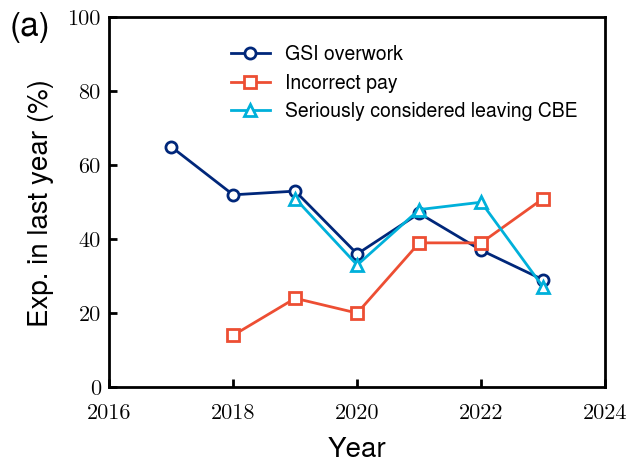

In [74]:
from scipy.stats import linregress

gsi = pd.DataFrame({'year':[2017, 2018, 2019, 2020, 2021, 2022, 2023], 'percent':[65, 52, 53, 36, 47, 37, 29]})
fgsi= linregress(gsi.year, gsi.percent)
pay = pd.DataFrame({'year':[2018, 2019, 2020, 2021, 2022, 2023], 'percent':[14, 24, 20, 39, 39, 51]})
fpay= linregress(pay.year, pay.percent)
lea = pd.DataFrame({'year':[2019,2020,2021,2022,2023], 'percent':[51, 33, 48, 50, 27]})
flea= linregress(lea.year, lea.percent)
    
data = [gsi, pay, lea]
fdat = [fgsi,fpay,flea]
print('R^2 for lin fits')
for i in fdat: print(i.rvalue**2)

kwargs = {'markersize':8, 'markerfacecolor':'w', 'mew':2, 'lw':2}
for x,y,fy,c,m,lab in zip([i.year for i in data], [i.percent for i in data], 
                      fdat, [COLORS_UCB['bb'], COLORS_UCB['gg'], COLORS_UCB['law']], ['o', 's', '^'],
                      ['GSI overwork', 'Incorrect pay', 'Seriously considered leaving CBE']): 
    fyear = np.arange(x[0], 2024, 1)
    plt.plot(x, y, c=c, marker=m, **kwargs,zorder=4, label=lab)
    # plt.plot(fyear, fy.intercept+fyear*fy.slope, c=c, label='_None')

plt.text(-0.20, 0.95, '(a)', transform=plt.gca().transAxes, fontsize=24)
plt.ylabel('Exp. in last year (%)')
plt.ylim(0, 100)
plt.yticks([0,20,40,60,80,100])
plt.xlabel('Year')
plt.xlim(2016, 2024)
plt.xticks([2016, 2018, 2020, 2022, 2024])
plt.legend(loc='best')
tjy.ticks()

# plt.savefig('imgs/hist1.png')

R^2 for lin fits
0.46320739419490853
0.8419825072886297


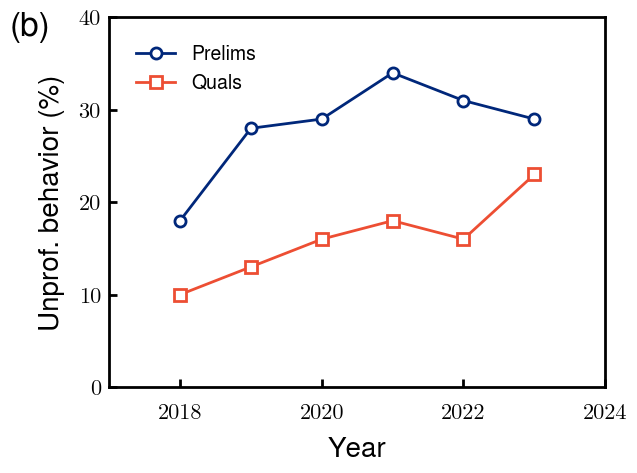

In [12]:
from scipy.stats import linregress

pre = pd.DataFrame({'year':[2018, 2019, 2020, 2021, 2022, 2023], 'percent':[18, 28, 29, 34, 31, 29]})
fpre= linregress(pre.year, pre.percent)
qua = pd.DataFrame({'year':[2018, 2019, 2020, 2021, 2022, 2023], 'percent':[10, 13, 16, 18, 16, 23]})
fqua= linregress(qua.year, qua.percent)
data = [pre, qua]
fdat = [fpre,fqua]

print('R^2 for lin fits')
for i in fdat: print(i.rvalue**2)

fyear= np.arange(2018,2024,1)
kwargs = {'markersize':8, 'markerfacecolor':'w', 'mew':2, 'lw':2}
for x,y,fy,c,m in zip([i.year for i in data], [i.percent for i in data], fdat, [COLORS_UCB['bb'], COLORS_UCB['gg'], COLORS_UCB['fr']], ['o', 's', '^']): 
    plt.plot(x, y, c=c, marker=m, **kwargs,zorder=4)
    # plt.plot(fyear, fy.intercept+fyear*fy.slope, c=c)

plt.text(-0.20, 0.95, '(b)', transform=plt.gca().transAxes, fontsize=24)
plt.ylabel('Unprof. behavior (%)')
plt.ylim(0, 40)
plt.yticks([0,10,20,30,40])
plt.xlabel('Year')
plt.xlim(2017, 2024)
plt.xticks([2018, 2020, 2022, 2024])
plt.legend(['Prelims', 'Quals'], loc='best')
tjy.ticks()

# plt.savefig('imgs/hist2.png')

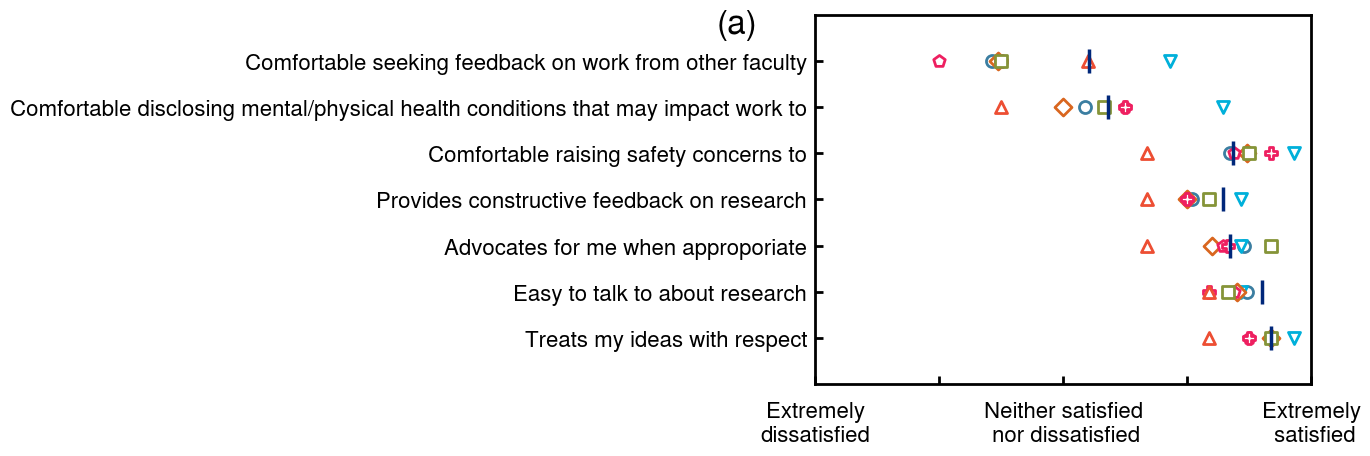

In [106]:
AVG = {'color':COLORS_UCB['bb'], 'marker':'|', 's':300, 'linewidths':2.5} 
bURM= {'color':'w','marker':'o', 's':75, 'edgecolors':COLORS_UCB['fr'], 'linewidths':2.}
INT = {'color':'w','marker':'v', 's':75, 'edgecolors':COLORS_UCB['law'],'linewidths':2.}
WOM = {'color':'w','marker':'D', 's':75, 'edgecolors':COLORS_UCB['we'], 'linewidths':2.}
QUE = {'color':'w','marker':'p', 's':75, 'edgecolors':COLORS_UCB['rg'], 'linewidths':2.}
rURM= {'color':'w','marker':'P', 's':75, 'edgecolors':COLORS_UCB['rg'], 'linewidths':2.}
DIS = {'color':'w','marker':'^', 's':75, 'edgecolors':COLORS_UCB['gg'], 'linewidths':2.}
FIR = {'color':'w','marker':'s', 's':75, 'edgecolors':COLORS_UCB['soy'],'linewidths':2.}

y = 'Comfortable seeking feedback on work from other faculty'
for x,kw in zip([3.21, 2.42, 3.86, 2.47, 2.00, 2.50, 2.50, 3.20],
                [AVG,   bURM, INT, WOM,   QUE, rURM, FIR, DIS]):
    if kw==AVG: zorder = 4
    else :      zorder = 1
    plt.scatter(x, y, **kw, zorder=zorder)
    
y = 'Easy to talk to about research'
for x,kw in zip([4.60, 4.48, 4.43, 4.40, 4.375, 4.17, 4.33, 4.17],
                [AVG,   bURM, INT, WOM,    QUE, rURM, FIR, DIS]):
    if kw==AVG: zorder = 4
    else :      zorder = 1
    plt.scatter(x, y, **kw, zorder=zorder)
    
y = 'Advocates for me when approporiate'
for x,kw in zip([4.34, 4.46, 4.43, 4.20, 4.29, 4.33, 4.67, 3.67],
                [AVG,   bURM, INT, WOM,   QUE, rURM, FIR, DIS]):
    if kw==AVG: zorder = 4
    else :      zorder = 1
    plt.scatter(x, y, **kw, zorder=zorder)   
    
y = 'Treats my ideas with respect'
for x,kw in zip([4.67, 4364, 4.86, 4.67, 4.5, 4.5, 4.67, 4.17], 
                [AVG, bURM, INT, WOM, QUE, rURM, FIR, DIS]):
    if kw==AVG: zorder = 4
    else :      zorder = 1
    plt.scatter(x, y, **kw, zorder=zorder)


    
y = 'Provides constructive feedback on research'
for x,kw in zip([4.29, 4.04, 4.43, 4.00, 4.00, 4.00, 4.17, 3.67],
                [AVG,   bURM, INT, WOM,   QUE, rURM, FIR, DIS]):
    if kw==AVG: zorder = 4
    else :      zorder = 1
    plt.scatter(x, y, **kw, zorder=zorder)

y = 'Comfortable raising safety concerns to'
for x,kw in zip([4.37, 4.34, 4.86, 4.48, 4.375, 4.67, 4.50, 3.67],
                [AVG,   bURM, INT, WOM,   QUE, rURM, FIR, DIS]):
    if kw==AVG: zorder = 4
    else :      zorder = 1
    plt.scatter(x, y, **kw, zorder=zorder)




plt.text(-0.20, 0.95, '(a)', transform=plt.gca().transAxes, fontsize=24)
plt.ylim(-1,7)
plt.xlim(1,5)
plt.xticks([1,2,3,4,5], ['Extremely\ndissatisfied','', 'Neither satisfied\n nor dissatisfied','', 'Extremely\n satisfied'])

# plt.savefig('imgs/spaces.png')
plt.show()

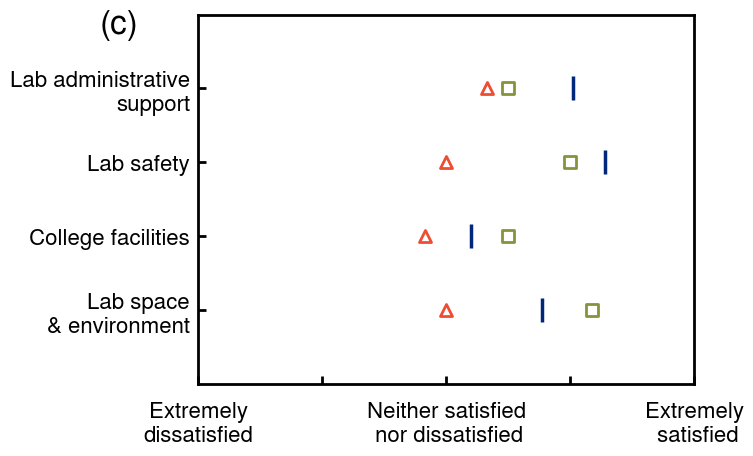

In [97]:
kwavg = {'color':COLORS_UCB['bb'], 'marker':'|', 's':300, 'linewidths':2.5} 
kwdis = {'color':'w','marker':'^', 's':75, 'edgecolors':COLORS_UCB['gg'], 'linewidths':2.}
kwfir = {'color':'w','marker':'s', 's':75, 'edgecolors':COLORS_UCB['soy'], 'linewidths':2.}

y = 'Lab space\n& environment'
plt.scatter(3.77, y, **kwavg)
plt.scatter(3.00, y, **kwdis)
plt.scatter(4.17, y, **kwfir)

y = 'College facilities'
plt.scatter(3.20, y, **kwavg)
plt.scatter(2.83, y, **kwdis)
plt.scatter(3.50, y, **kwfir)

y = 'Lab safety'
plt.scatter(4.28, y, **kwavg)
plt.scatter(3.00, y, **kwdis)
plt.scatter(4.00, y, **kwfir)

y = 'Lab administrative\nsupport'
plt.scatter(4.02, y, **kwavg)
plt.scatter(3.33, y, **kwdis)
plt.scatter(3.50, y, **kwfir)

plt.text(-0.20, 0.95, '(c)', transform=plt.gca().transAxes, fontsize=24)
plt.ylim(-1,4)
plt.xlim(1,5)
plt.xticks([1,2,3,4,5], ['Extremely\ndissatisfied','', 'Neither satisfied\n nor dissatisfied','', 'Extremely\n satisfied'])

# plt.savefig('imgs/spaces.png')
plt.show()